In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import poisson
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
import scipy
from scipy import stats


In [2]:
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6720\1383051064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x='income_group', y='life_expectancy', palette="Set2")


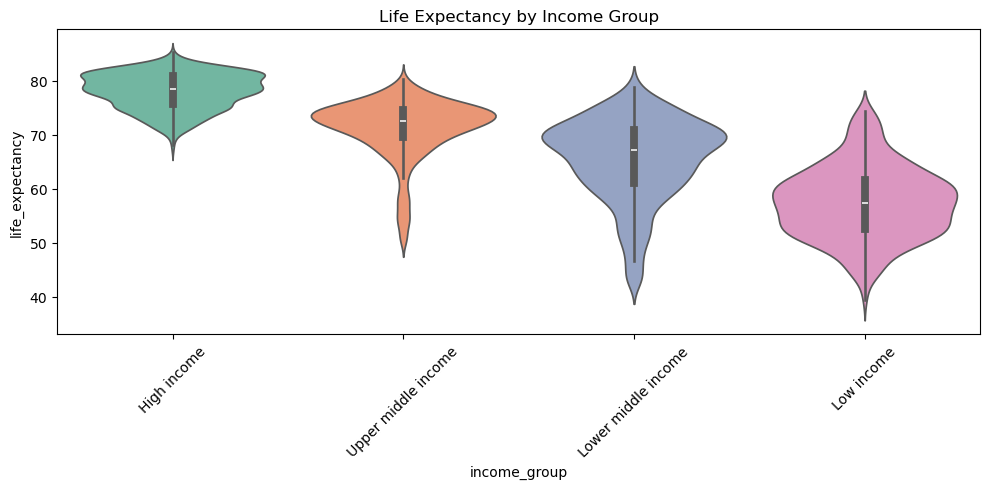

In [3]:
# --- Violin Plot: Life Expectancy by Income Group ---
# The violin plot displays the distribution of life expectancy for each income group.
# It shows the density of life expectancy values along with their range and central tendency.

df_violin = df[['income_group', 'life_expectancy']].dropna()  # Remove rows with NaN values for cleaner visuals

plt.figure(figsize=(10, 5))  
sns.violinplot(data=df_violin, x='income_group', y='life_expectancy', palette="Set2")  
plt.title('Life Expectancy by Income Group')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show() 

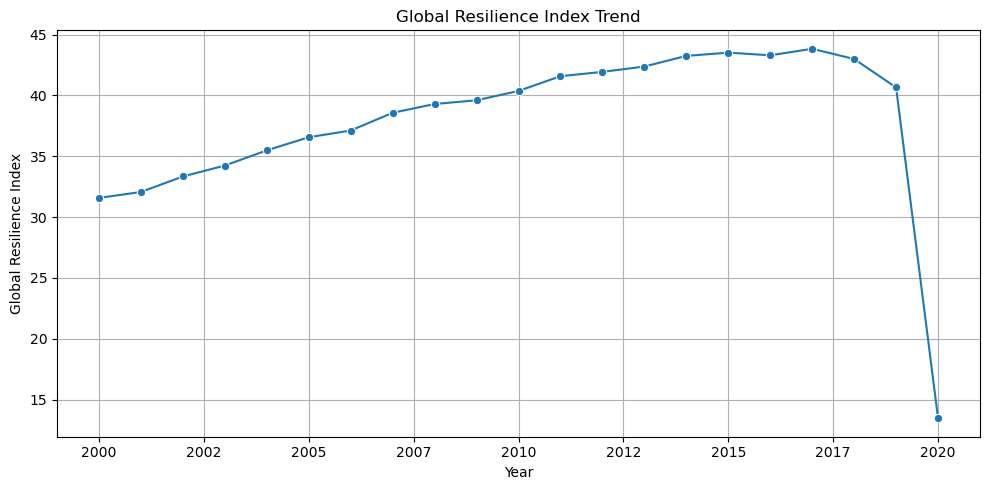

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 5))

df_grouped = df.groupby('year')['global_development_resilience_index'].mean().reset_index()
df_grouped['year'] = df_grouped['year'].astype(int)

sns.lineplot(
    data=df_grouped,
    x='year',
    y='global_development_resilience_index',
    marker='o'
)

plt.title("Global Resilience Index Trend")
plt.ylabel("Global Resilience Index")
plt.xlabel("Year")
plt.grid(True)


# Force years as integers
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6720\2673622650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


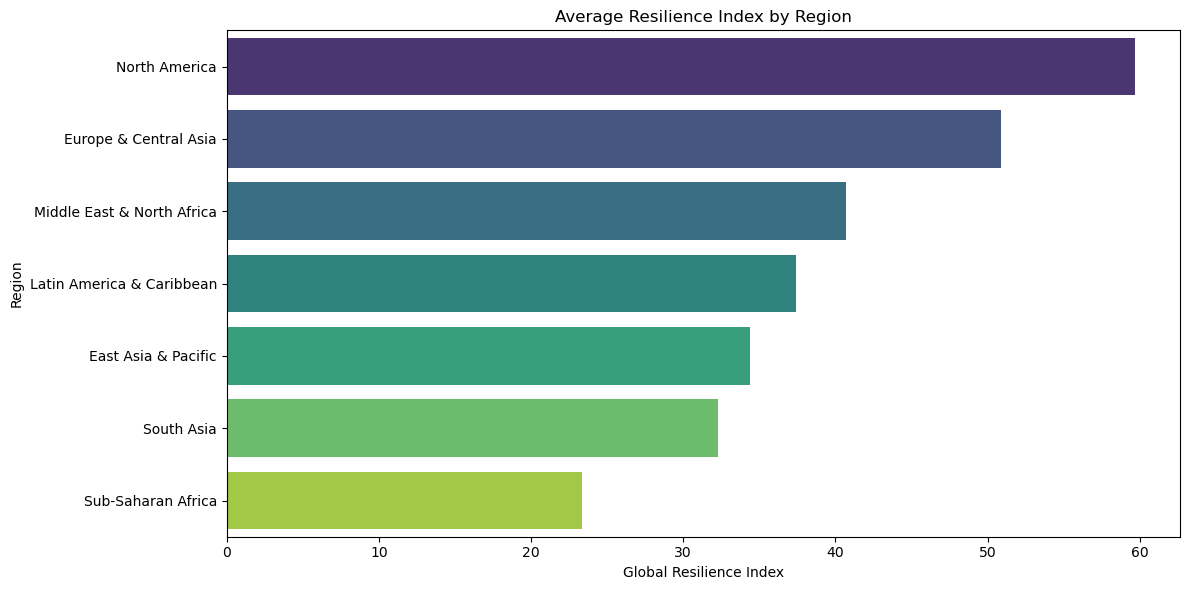

In [10]:
# === 2. Resilience Comparison by Region ===
plt.figure(figsize=(12, 6))
df_region = df.groupby('region')['global_development_resilience_index'].mean().reset_index()
df_region = df_region.sort_values('global_development_resilience_index', ascending=False)
sns.barplot(
    data=df_region,
    x='global_development_resilience_index',
    y='region',
    palette="viridis"
)
plt.title("Average Resilience Index by Region")
plt.xlabel("Global Resilience Index")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

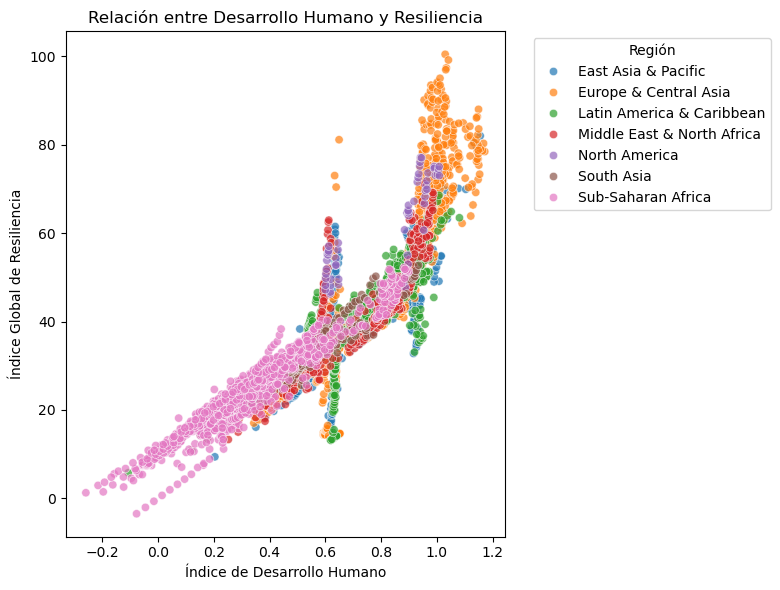

In [11]:
# === 3. Relación Desarrollo Humano vs Resiliencia ===
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='human_development_index',
    y='global_development_resilience_index',
    hue='region',
    alpha=0.7
)
plt.title("Relación entre Desarrollo Humano y Resiliencia")
plt.xlabel("Índice de Desarrollo Humano")
plt.ylabel("Índice Global de Resiliencia")
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

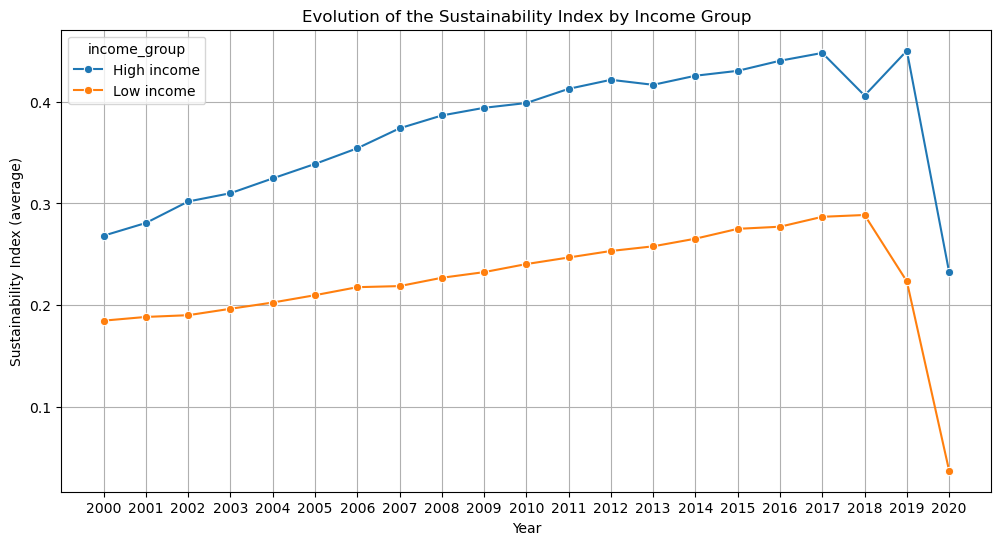

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Make sure the dataframe df has an integer 'year'
df['year'] = df['year'].astype(int)


# Create a sustainability index by normalizing and averaging indicators (example)
indicators = [
    'gdp_per_capita',
    'renewable_energy_pct',
    'internet_usage_pct',
    'governance_quality_index',
    'life_expectancy',
    'human_development_index',
    'digital_readiness_score'
]

for col in indicators:
    if df[col].notnull().any():
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:
            df[col + '_norm'] = (df[col] - min_val) / (max_val - min_val)
        else:
            df[col + '_norm'] = 0
    else:
        df[col + '_norm'] = pd.NA

norm_cols = [col + '_norm' for col in indicators]
df['sustainable_index'] = df[norm_cols].mean(axis=1)


# Filter high and low income groups for gap analysis
groups_of_interest = ['High income', 'Low income']
df_gap = df[df['income_group'].isin(groups_of_interest)]

# Group sustainable average by year and income_group
df_gap = df_gap.groupby(['year', 'income_group'], as_index=False)['sustainable_index'].mean()

# Force 'year' to be int (again, to avoid decimals)
df_gap['year'] = df_gap['year'].astype(int)


# Sustainable index evolution line graph by income group
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gap, x='year', y='sustainable_index', hue='income_group', marker='o')

plt.title('Evolution of the Sustainability Index by Income Group')
plt.ylabel('Sustainability Index (average)')
plt.xlabel('Year')

# Configurar ticks eje X para mostrar solo años enteros, cada año
plt.xticks(df_gap['year'].unique())  # pone ticks solo donde hay años reales
plt.grid(True)
plt.show()
